# Load dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd

# read csv file into a pandas dataframe and keep NA values
df = pd.read_csv('/tch-pca-2.csv.updated.csv',keep_default_na=False)
print(df)

        pathloss  doppler shift label
0     -23.265006       3.722180    NA
1     -16.482655       1.153439    NA
2     -14.824642       0.859113    NA
3     -18.508977      -1.653258    NA
4     -12.481515       1.505040    LA
...          ...            ...   ...
22004 -12.296848      -1.881210    NA
22005   4.667890      -0.824496    NA
22006  -1.851043      -2.783185    NA
22007   4.722575      -1.217843    NA
22008  -0.278318      -1.183628    NA

[22009 rows x 3 columns]


# Thống kê các label

NA    10995
SO     2224
JJ     2205
LA     1716
LL     1645
RL     1641
RA     1583
Name: label, dtype: int64


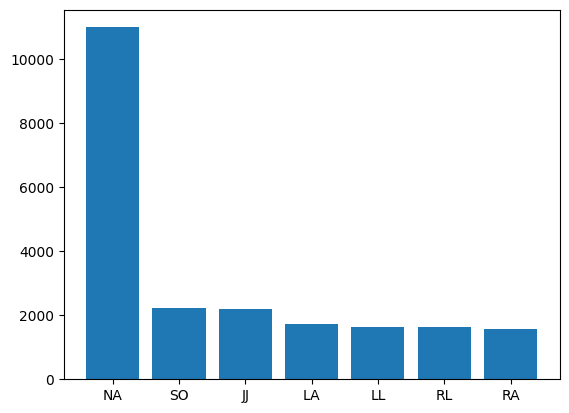

In [7]:
import matplotlib.pyplot as plt
value_counts = df['label'].value_counts().sort_values(ascending=False)
print(value_counts)
plt.bar(value_counts.index, value_counts.values)
plt.show()

# Xử lý imbalance

In [14]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

X = df.drop('label', axis=1)
y = pd.DataFrame(df['label'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
print('Number of samples in each class before oversampling:')
print(df['class'].value_counts())

print('Number of samples in each class after oversampling:')
print(y_train_resampled.value_counts())

Number of samples in each class before oversampling:
NA    10995
SO     2224
JJ     2205
LA     1716
LL     1645
RL     1641
RA     1583
Name: label, dtype: int64
Number of samples in each class after oversampling:
label
JJ       8796
LA       8796
LL       8796
NA       8796
RA       8796
RL       8796
SO       8796
dtype: int64


In [18]:
label_to_number = {
    "NA": 0,
    "LA": 1,
    "RA": 2,
    "LL": 3,
    "RL": 4,
    "JJ": 5,
    "SO": 6
}

# Convert the labels to numbers.
#y_train['label'] = y_train['label'].apply(lambda x: label_to_number[x])
#y_test['label'] = y_test['label'].apply(lambda x: label_to_number[x])

# Print the converted labels.
print(y_train)

       label
6042       0
7804       1
6920       5
5358       5
6744       0
...      ...
16065      6
6385       0
7450       0
7452       0
9923       6

[17607 rows x 1 columns]


# Apply model

In [23]:
import tensorflow as tf

X_train = tf.keras.utils.normalize(X_train)
X_test = tf.keras.utils.normalize(X_test)

model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(32, 3, activation='relu', input_shape=(2,)),
    tf.keras.layers.MaxPooling1D(2),
    tf.keras.layers.Conv1D(64, 2, activation='relu'),
    tf.keras.layers.MaxPooling1D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10)
loss, accuracy = model.evaluate(X_test, y_test)
print('Loss:', loss)
print('Accuracy:', accuracy)

ValueError: ignored